# Plot one of the episodes

Select a run from beta_simulation and plot one episode from it. 

JMA 5 Sept 2023


In [2]:
import os, re, sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [98]:
# Select on episode from the runs
EPISODE =3
samples = pd.read_csv('../Simulation 10_247-14-04.csv')
starts = samples.loc[samples.iloc[:,0] == 0,:]
# one_episode = starts.index[starts[EPISODE:(EPISODE+1)]]
episode_range = starts.iloc[EPISODE:(EPISODE+2),0].index
#samples.iloc[episode_range[0]:episode_range[1],:]
#episode_range[0]:episode_range[1]
e = list(range(episode_range[0], episode_range[1]))
an_episode = samples.iloc[e,3:]
an_episode



,day_number,infection,severity,cum_drug,outcome,efficacy,drug
41,0,38,15.000000,0.000000,none,0.000000,0.0
42,1,41,20.252494,0.031160,none,3.316114,0.1
43,2,46,21.930526,0.021814,none,-0.324094,0.0
44,3,51,30.783053,0.194153,none,5.724465,0.6
45,4,58,31.731669,0.195930,none,0.967477,0.2
46,5,65,39.126921,0.380790,none,9.114729,0.8
47,6,66,41.265383,0.356121,none,5.006271,0.3
48,7,73,47.514048,0.466289,none,5.926165,0.7
49,8,82,53.403560,0.359898,none,0.259036,0.1
50,9,91,67.551179,0.463421,none,6.706078,0.7


In [99]:
die = np.any( an_episode['outcome'] == 'die')
recover = np.any( an_episode['outcome'] == 'recover')

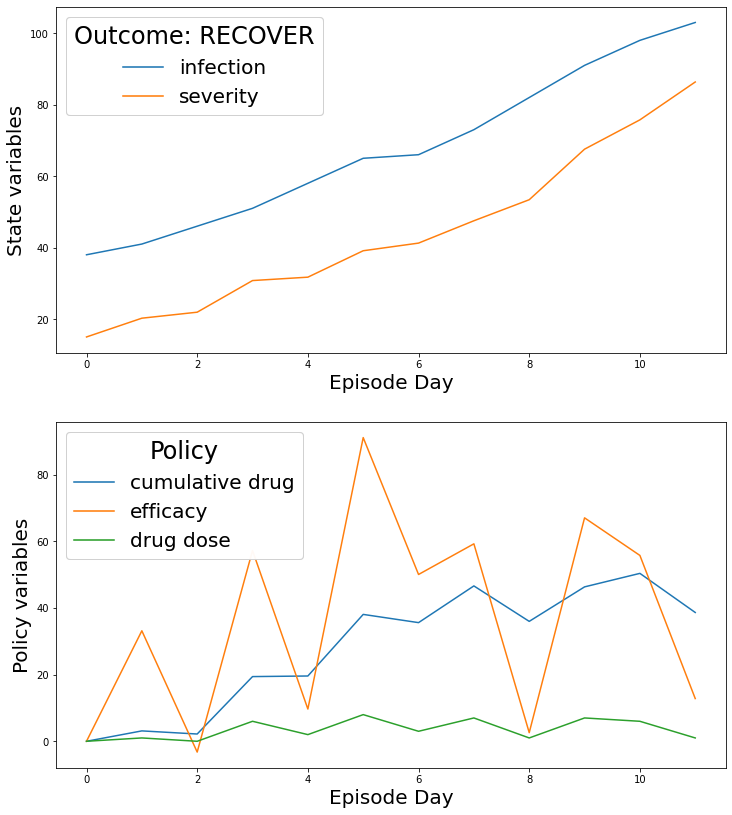

In [100]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figwidth(12)
fig.set_figheight(14)
ax1.plot(an_episode['day_number'], an_episode['infection'], label='infection')
ax1.plot(an_episode['day_number'], an_episode['severity'], label='severity')
legend1 = ax1.legend(loc="upper left", title=("Outcome: DIE" if die else "Outcome: RECOVER") , title_fontsize=24,fontsize=20)
ax1.set_xlabel('Episode Day', fontsize=20)
ax1.set_ylabel('State variables', fontsize=20)
ax1.add_artist(legend1)

ax2.plot(an_episode['day_number'], 100 * an_episode['cum_drug'], label='cumulative drug')
ax2.plot(an_episode['day_number'], 10 * an_episode['efficacy'], label='efficacy')
ax2.plot(an_episode['day_number'], 10 * an_episode['drug'], label='drug dose')
ax2.set_xlabel('Episode Day', fontsize=20)
ax2.set_ylabel('Policy variables', fontsize=20)

legend2 = ax2.legend(loc="upper left", fontsize=20, title="Policy", title_fontsize=24)

ax2.add_artist(legend2)